/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/34.1k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/167M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/24.3M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/55000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


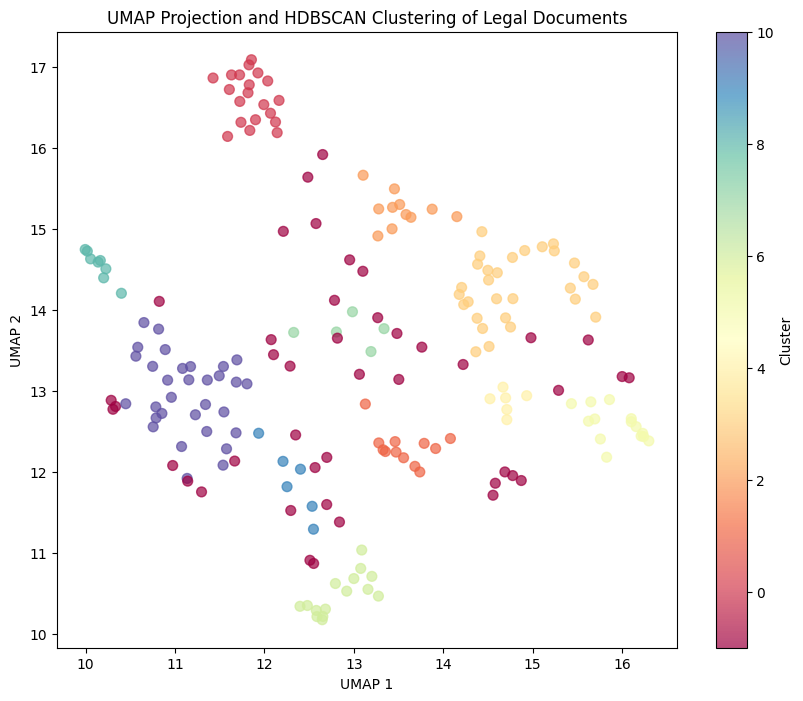

Clustered data saved to clustered_documents_eurlex.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
from datasets import load_dataset

# 1. Load the EURLEX dataset from LexGLUE
# (If EURLEX is unavailable, choose another legal text dataset from Hugging Face.)
dataset = load_dataset("lex_glue", "eurlex", split="train")
# We'll use the "text" field as our document text; adjust if needed.
texts = dataset["text"][:200]  # Use the first 200 documents for demonstration

# 2. Generating Embeddings using a pre-trained Sentence Transformer
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts, show_progress_bar=True)

# 3. Dimensionality Reduction with UMAP (for visualization)
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embeddings = reducer.fit_transform(embeddings)

# 4. Clustering with HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
clusters = clusterer.fit_predict(umap_embeddings)

# 5. Saving results in a DataFrame
df = pd.DataFrame({"text": texts, "cluster": clusters})

# 6. Visualizing the Clusters
plt.figure(figsize=(10, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1],
            c=clusters, cmap='Spectral', s=50, alpha=0.7)
plt.title("UMAP Projection and HDBSCAN Clustering of Legal Documents")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(label="Cluster")
plt.show()

# 7. Saving the Clustered Data to CSV
output_csv = "clustered_documents_eurlex.csv"
df.to_csv(output_csv, index=False)
print(f"Clustered data saved to {output_csv}")
